In [1]:
import jCMIP as jc
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import glob
from numpy import loadtxt
import scipy

In [2]:
sg_locs = loadtxt("sg_grid.txt")

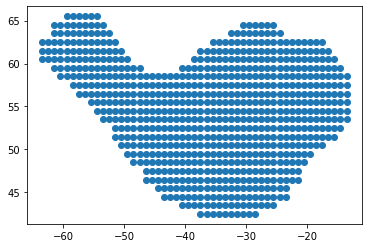

In [3]:
plt.scatter(sg_locs[:,1], sg_locs[:,0])

In [4]:
from scipy.spatial import Delaunay
import numpy as np


def alpha_shape(points, alpha, only_outer=True):
    """
    Compute the alpha shape (concave hull) of a set of points.
    :param points: np.array of shape (n,2) points.
    :param alpha: alpha value.
    :param only_outer: boolean value to specify if we keep only the outer border
    or also inner edges.
    :return: set of (i,j) pairs representing edges of the alpha-shape. (i,j) are
    the indices in the points array.
    """
    assert points.shape[0] > 3, "Need at least four points"

    def add_edge(edges, i, j):
        """
        Add a line between the i-th and j-th points,
        if not in the list already
        """
        if (i, j) in edges or (j, i) in edges:
            # already added
            assert (j, i) in edges, "Can't go twice over same directed edge right?"
            if only_outer:
                # if both neighboring triangles are in shape, it is not a boundary edge
                edges.remove((j, i))
            return
        edges.add((i, j))

    tri = Delaunay(points)
    edges = set()
    # Loop over triangles:
    # ia, ib, ic = indices of corner points of the triangle
    for ia, ib, ic in tri.simplices:
        pa = points[ia]
        pb = points[ib]
        pc = points[ic]
        # Computing radius of triangle circumcircle
        # www.mathalino.com/reviewer/derivation-of-formulas/derivation-of-formula-for-radius-of-circumcircle
        a = np.sqrt((pa[0] - pb[0]) ** 2 + (pa[1] - pb[1]) ** 2)
        b = np.sqrt((pb[0] - pc[0]) ** 2 + (pb[1] - pc[1]) ** 2)
        c = np.sqrt((pc[0] - pa[0]) ** 2 + (pc[1] - pa[1]) ** 2)
        s = (a + b + c) / 2.0
        area = np.sqrt(s * (s - a) * (s - b) * (s - c))
        circum_r = a * b * c / (4.0 * area)
        if circum_r < alpha:
            add_edge(edges, ia, ib)
            add_edge(edges, ib, ic)
            add_edge(edges, ic, ia)
    return edges

In [12]:
sg_lines = alpha_shape(sg_locs, 4, only_outer=True)
sg_outline = np.reshape(list(sg_lines),[154,1])
np.unique(sg_outline)
sg_outline_lat = sg_locs[sg_outline,0]
sg_outline_lon = sg_locs[sg_outline,1] 

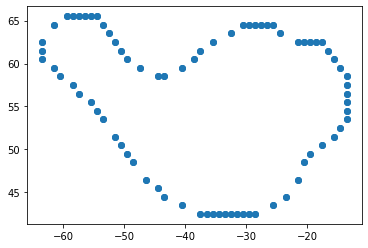

In [20]:
plt.scatter(sg_outline_lon, sg_outline_lat)

In [46]:
sg_outline_lon[sg_outline_lat==42.5]
lats = np.unique(sg_locs[:,0])

#overall boundaries for larger shape, need to get rid of concave area
wref_lon=np.zeros(np.shape(lats)[0])
eref_lon=np.zeros(np.shape(lats)[0])
for i in np.arange(np.shape(lats)[0]):
    ref_lat = lats[i]
    wref_lon[i] = np.min(sg_locs[sg_locs[:,0]==ref_lat, 1])
    eref_lon[i] = np.max(sg_locs[sg_locs[:,0]==ref_lat, 1])
    

In [ ]:
# for IPSL model, which has negative longitudes, first set box for sampling
idx_sglon = (dataset_area.nav_lon > -64) | (dataset_area.nav_lon < -13)
idx_sg = (dataset_area.nav_lat > 42) & (dataset_area.nav_lat < 66) & idx_sglon
idx_sg.plot()

In [49]:
# for all other models, which have positive longitudes, first set box for sampling
idx_sglon = (dataset_area.longitude > 296) | (dataset_area.longitude < 347)
idx_sg = (dataset_area.latitude > 42) & (dataset_area.latitude < 66) & idx_sglon
idx_sg.plot()

NameError: name 'dataset_area' is not defined

In [35]:
ref_lat = lats[i]

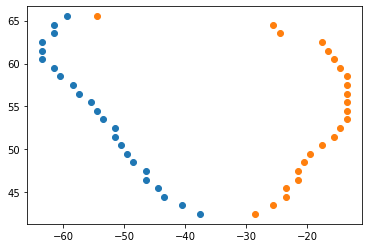

In [47]:
plt.scatter(wref_lon, lats)
plt.scatter(eref_lon, lats)